In [14]:
import pandas as pd
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [2]:
train

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [3]:
train.facts[0]

'On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana.  During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union.  Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation.  Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.”  Thompson then appealed to the Supreme Court of Louisiana.  That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true.  Finally, that court held that the First Amendment protects uninhibited, robust debate, rather t

In [4]:
import re

reg = re.compile('[a-zA-Z]+')
mat = reg.findall(train.facts[0])
print(mat)

' '.join(mat)

['On', 'June', 'Phil', 'St', 'Amant', 'a', 'candidate', 'for', 'public', 'office', 'made', 'a', 'television', 'speech', 'in', 'Baton', 'Rouge', 'Louisiana', 'During', 'this', 'speech', 'St', 'Amant', 'accused', 'his', 'political', 'opponent', 'of', 'being', 'a', 'Communist', 'and', 'of', 'being', 'involved', 'in', 'criminal', 'activities', 'with', 'the', 'head', 'of', 'the', 'local', 'Teamsters', 'Union', 'Finally', 'St', 'Amant', 'implicated', 'Herman', 'Thompson', 'an', 'East', 'Baton', 'Rouge', 'deputy', 'sheriff', 'in', 'a', 'scheme', 'to', 'move', 'money', 'between', 'the', 'Teamsters', 'Union', 'and', 'St', 'Amant', 's', 'political', 'opponent', 'Thompson', 'successfully', 'sued', 'St', 'Amant', 'for', 'defamation', 'Louisiana', 's', 'First', 'Circuit', 'Court', 'of', 'Appeals', 'reversed', 'holding', 'that', 'Thompson', 'did', 'not', 'show', 'St', 'Amant', 'acted', 'with', 'malice', 'Thompson', 'then', 'appealed', 'to', 'the', 'Supreme', 'Court', 'of', 'Louisiana', 'That', 'cour

'On June Phil St Amant a candidate for public office made a television speech in Baton Rouge Louisiana During this speech St Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union Finally St Amant implicated Herman Thompson an East Baton Rouge deputy sheriff in a scheme to move money between the Teamsters Union and St Amant s political opponent Thompson successfully sued St Amant for defamation Louisiana s First Circuit Court of Appeals reversed holding that Thompson did not show St Amant acted with malice Thompson then appealed to the Supreme Court of Louisiana That court held that although public figures forfeit some of their First Amendment protection from defamation St Amant accused Thompson of a crime with utter disregard of whether the remarks were true Finally that court held that the First Amendment protects uninhibited robust debate rather than an open season to shoot down the good name 

In [15]:
reg = re.compile('[a-zA-Z]+')
for i in range(len(train)):
    first = reg.findall(train.first_party[i])
    second = reg.findall(train.second_party[i])
    fact = ' '.join(reg.findall(train.facts[i]))
    for f in first:
        if f in fact:
            fact = fact.replace(f' {f} ',' <first> ')
    for f in second:
        if f in fact:
            fact = fact.replace(f' {f} ',' <second> ')
    train.loc[i,'facts'] = fact
            
for i in range(len(test)):
    first = reg.findall(test.first_party[i])
    second = reg.findall(test.second_party[i])
    fact = ' '.join(reg.findall(test.facts[i]))
    for f in first:
        if f in fact:
            fact = fact.replace(f' {f} ',' <first> ')
    for f in second:
        if f in fact:
            fact = fact.replace(f' {f} ',' <second> ')
    test.loc[i,'facts'] = fact
    
test

,ID,first_party,second_party,facts
0,TEST_0000,Salerno,United States,The Bail Reform Act allowed the federal courts...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon <second> was a defendant in a class ac...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.",In and <second> <second> <second> broadcast th...
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,In a magistrate judge issued a warrant authori...
...,...,...,...,...
1235,TEST_1235,"Haitian Centers Council, Inc., et al.","Chris Sale, Acting Commissioner, Immigration A...",According to Executive Order No signed by Pres...
1236,TEST_1236,Whitman,"American Trucking Associations, Inc.",Section a of the Clean Air Act CAA requires th...
1237,TEST_1237,Linda A. Matteo and John J. Madigan,William G. Barr,Linda <first> <first> <first> <first> created ...
1238,TEST_1238,Washington State Apple Advertising Commission,Hunt,In the North Carolina Board of Agriculture ado...


In [6]:
train.facts[0]

'On June <first> <first> <first> a candidate for public office made a television speech in Baton Rouge Louisiana During this speech <first> <first> accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union Finally <first> <first> implicated <second> <second> an East Baton Rouge deputy sheriff in a scheme to move money between the Teamsters Union and <first> <first> s political opponent <second> successfully sued <first> <first> for defamation Louisiana s First Circuit Court of Appeals reversed holding that <second> did not show <first> <first> acted with malice <second> then appealed to the Supreme Court of Louisiana That court held that although public figures forfeit some of their First Amendment protection from defamation <first> <first> accused <second> of a crime with utter disregard of whether the remarks were true Finally that court held that the First Amendment protects uninhibited robust debate r

In [26]:
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=True,max_features=10000)
vectorizer.fit(train.facts)
tp = vectorizer.transform(train.facts).toarray()

for i in range(1,10001):
    train[i] = [j[i-1] for j in tp]
    
train

,ID,first_party,second_party,facts,first_party_winner,1,2,3,4,5,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,On June <first> <first> <first> a candidate fo...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted <first> <firs...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAIN_0003,Linkletter,Walker,Victor <first> was convicted in state court on...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN_0004,William Earl Fikes,Alabama,On April in Selma <second> an intruder broke i...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.",Alliance <second> <second> <second> an investm...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2475,TRAIN_2475,Peguero,United States,In the District Court sentenced Manuel D <firs...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,On March Enrico <second> <second> a lawful per...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
tp = vectorizer.transform(test.facts).toarray()

for i in range(1,10001):
    test[i] = [j[i-1] for j in tp]
    
test

,ID,first_party,second_party,facts,1,2,3,4,5,6,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,TEST_0000,Salerno,United States,The Bail Reform Act allowed the federal courts...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon <second> was a defendant in a class ac...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.",In and <second> <second> <second> broadcast th...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TEST_0004,Berger,Hanlon,In a magistrate judge issued a warrant authori...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,TEST_1235,"Haitian Centers Council, Inc., et al.","Chris Sale, Acting Commissioner, Immigration A...",According to Executive Order No signed by Pres...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1236,TEST_1236,Whitman,"American Trucking Associations, Inc.",Section a of the Clean Air Act CAA requires th...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237,TEST_1237,Linda A. Matteo and John J. Madigan,William G. Barr,Linda <first> <first> <first> <first> created ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1238,TEST_1238,Washington State Apple Advertising Commission,Hunt,In the North Carolina Board of Agriculture ado...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
train.iloc[:,4:]

,first_party_winner,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2474,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2475,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2476,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from pycaret import classification
classification.setup(data=train.iloc[:,4:],
                     target='first_party_winner',
                     fold_strategy='kfold',
                     train_size=0.8,
                     session_id=77)
                     # remove_outliers=True,
                     # outliers_method='iforest')

,Description,Value
0,Session id,77
1,Target,first_party_winner
2,Target type,Binary
3,Original data shape,"(2478, 10001)"
4,Transformed data shape,"(2478, 10001)"
5,Transformed train set shape,"(1982, 10001)"
6,Transformed test set shape,"(496, 10001)"
7,Numeric features,10000
8,Preprocess,True
9,Imputation type,simple


In [10]:
best = classification.compare_models(n_select=5,fold=10,sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6655,0.5000,1.0000,0.6655,0.7988,0.0000,0.0000,1.4660
lr,Logistic Regression,0.6645,0.5582,0.9948,0.6661,0.7975,0.0027,0.0119,2.7000
rf,Random Forest Classifier,0.6600,0.5437,0.9892,0.6641,0.7943,-0.0076,-0.0200,1.1290
et,Extra Trees Classifier,0.6569,0.5447,0.9688,0.6667,0.7894,0.0073,0.0115,2.4290
catboost,CatBoost Classifier,0.6544,0.5572,0.9636,0.6663,0.7874,0.0051,0.0041,10.7580
gbc,Gradient Boosting Classifier,0.6524,0.5337,0.9465,0.6690,0.7833,0.0174,0.0292,4.3210
ridge,Ridge Classifier,0.6423,0.0000,0.9001,0.6734,0.7697,0.0377,0.0445,1.0320
xgboost,Extreme Gradient Boosting,0.6271,0.5500,0.8390,0.6779,0.7491,0.0489,0.0541,17.5880
lightgbm,Light Gradient Boosting Machine,0.6196,0.5416,0.8378,0.6722,0.7452,0.0276,0.0319,1.7300
knn,K Neighbors Classifier,0.6044,0.5140,0.8343,0.6609,0.7369,-0.0195,-0.0221,3.1090


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Columns: 10005 entries, ID to 10000
dtypes: float64(10000), int64(1), object(4)
memory usage: 189.2+ MB


In [33]:
test.iloc[:,4:]

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([[0.38183941, 0.61816059],
       [0.3245849 , 0.6754151 ],
       [0.29666458, 0.70333542],
       ...,
       [0.29200093, 0.70799907],
       [0.30561229, 0.69438771],
       [0.25638624, 0.74361376]])

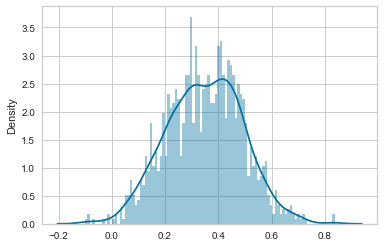

In [46]:
import seaborn as sns

tp = best[1].predict_proba(test.iloc[:,4:])

sns.distplot([i[1]-i[0] for i in tp],bins=100)
tp

In [54]:
ans = []
for i in tp:
    if i[1]-i[0] < 0.2:
        ans.append(0)
    else:
        ans.append(1)
sum(ans)

1052

In [55]:
sub = pd.read_csv('./sample_submission.csv').set_index('ID')
sub['first_party_winner'] = ans
sub.to_csv('./submission.csv')